<a href="https://colab.research.google.com/github/PaulToronto/Hong-Kong-University-of-Science-and-Technology-Coursera-Matrix-Algebra-for-Engineers/blob/main/1_Matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Matrices

In [1]:
import sympy as sym
import numpy as np

import matplotlib.pyplot as plt

## 1.1 Matrix Definitions

A **matrix** is a rectangular array of numbers. The numbers can be symbols. 

$$
A = 
\left[
\begin{matrix}
a & b \\
c & d
\end{matrix}
\right],
B = 
\left[
\begin{matrix}
a & b \\ 
c & d \\
e & f
\end{matrix}
\right],
C = 
\left[
\begin{matrix}
a & b & c \\
d & e & f
\end{matrix}
\right]
$$

- $A$ is a $2 \times 2$ matrix
- $B$ is a $3 \times 2$ matrix
- $C$ is a $2 \times 3$ matrix. 

In [2]:
a, b, c, d, e, f = sym.symbols('a b c d e f')

In [3]:
A = sym.Matrix([[a,  b],
                [c, d]])

B = sym.Matrix([[a, b],
                [c, d],
                [e, f]])

C = sym.Matrix([[a, b, c],
                [d, e, f]])

In [4]:
A

Matrix([
[a, b],
[c, d]])

In [5]:
B

Matrix([
[a, b],
[c, d],
[e, f]])

In [6]:
C

Matrix([
[a, b, c],
[d, e, f]])

$$
x = 
\left[
\begin{matrix}
a \\
b \\
c
\end{matrix}
\right],
y = 
\left[
\begin{matrix}
a & b & c
\end{matrix}
\right]
$$

- $x$ is a **column vector** or a $3 \times 1$ matrix
- $y$ is a  **row vector** or a $1 \times 3$ matrix

### A General Matrix

$$
A_{m \times n} = 
\left[
\begin{matrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{matrix}
\right]
$$

### Matrix Addition

- Two matrices can be only be added together when they have the same dimensions

In [7]:
a, b, c, d, e, f, g, h = sym.symbols('a b c d e f g h')

A = sym.Matrix([[a, b],
                [c, d]])

B = sym.Matrix([[e, f],
                [g, h]])

In [8]:
A

Matrix([
[a, b],
[c, d]])

In [9]:
B

Matrix([
[e, f],
[g, h]])

In [10]:
A + B

Matrix([
[a + e, b + f],
[c + g, d + h]])

### Multiply a Matrix by a Scalar

In [11]:
k = sym.symbols('k')

k * A

Matrix([
[a*k, b*k],
[c*k, d*k]])

### Matrix Multiplication

- Note that matrix muliplication is **not commutative**
- An $m \times n$ matrix can only be multiplied by an $n \times p$ matrix
    - The values $m$ and $p$ are arbitrary
    - The number of columns in the first matrix ($n$) must be equal to the number of rows in the second matrix ($n$)
        - The result is an $m \times p$ matrix

In [12]:
A * B

Matrix([
[a*e + b*g, a*f + b*h],
[c*e + d*g, c*f + d*h]])

In [13]:
# alternately
sym.Matrix([[A.row(0).dot(B.col(0)), A.row(0).dot(B.col(1))],
            [A.row(1).dot(B.col(0)), A.row(1).dot(B.col(1))]])

Matrix([
[a*e + b*g, a*f + b*h],
[c*e + d*g, c*f + d*h]])

In [14]:
A.row(0) * B.col(0), A.row(0).dot(B.col(0))

(Matrix([[a*e + b*g]]), a*e + b*g)

In [15]:
type(A.row(0) * B.col(0)), type(A.row(0).dot(B.col(0)))

(sympy.matrices.dense.MutableDenseMatrix, sympy.core.add.Add)

In [16]:
B * A

Matrix([
[a*e + c*f, b*e + d*f],
[a*g + c*h, b*g + d*h]])

In [17]:
A * B == A * B, A * B == B * A

(True, False)

#### General Formula for the ${ij}^{th}$  element of the product of two matrices

Let $A$, $B$ and $C$ be matrices such that $C = AB$. Then,

$$
c_{ij} = \sum_{k=1}^{n}{a_{ik}b_{kj}}
$$

#### $AB = AC$ does not imply $B = C$

In [18]:
A = sym.Matrix([[1, 2],
                [2, 4]])

B = sym.Matrix([[2, 1],
                [1, 3]])

C = sym.Matrix([[4, 3],
                [0, 2]])

In [19]:
# sympy
A * B == A * C, B == C

(True, False)

In [20]:
# sympy
(A * B).equals(A * C), B.equals(C)

(True, False)

In [21]:
# numpy
Anp = np.array(A, dtype='int64')
Bnp = np.array(B, dtype='int64')
Cnp = np.array(C, dtype='int64')

np.array_equal(Anp.dot(Bnp), Anp.dot(Cnp)), np.array_equal(B, C)

(True, False)

### Associative Law for Matrix Multiplication

$$
A(BC) = (AB)C
$$

### Special Matrices

#### Zero Matrix: $O_{m \times n}$

- The zero matrix is analogous to the scalar 0

$$
O = 
\left[
    \begin{matrix}
    0 & 0 \\
    0 & 0
    \end{matrix}
\right]
$$

This matrix is used a lot in the following equation, where $A$ is an $m \times n$ matrix, x is an $n \times 1$ column vector and the zero matrix is an $m \times 1$ column vector.

$Ax = O$

In [22]:
A = sym.zeros(2, 2)
A

Matrix([
[0, 0],
[0, 0]])

In [23]:
np.zeros((2, 2))

array([[0., 0.],
       [0., 0.]])

In [24]:
# note that sympy can also create a matrix of ones
sym.ones(3)

Matrix([
[1, 1, 1],
[1, 1, 1],
[1, 1, 1]])

#### Identity Matrix: $I_{n}$

- The identity matrix, denoted $I$, is analogous to the scalar 1
    - $AI = A = IA$, for any square matrix $A$
- The identity matrix is always a square matrix
- The identity matrix has only ones along the diagonal and zeros everywhere else

In [25]:
sym.eye(3)

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [26]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [27]:
# note that sympy can use `.eye()` to create
# matrices that are not square, therefore not
# identity matrices
sym.eye(3, 2)

Matrix([
[1, 0],
[0, 1],
[0, 0]])

In [28]:
np.eye(3, 2)

array([[1., 0.],
       [0., 1.],
       [0., 0.]])

#### Diagonal Matrix

$$
D =
\left[
    \begin{matrix}
    d_1 & 0 & 0 \\
    0 & d_2 & 0 \\
    0 & 0 & d_3 
    \end{matrix}
\right]
$$

In [29]:
sym.diag(1, 2, 3)

Matrix([
[1, 0, 0],
[0, 2, 0],
[0, 0, 3]])

In [30]:
sym.diag(3, 3, 7, 2, 8)

Matrix([
[3, 0, 0, 0, 0],
[0, 3, 0, 0, 0],
[0, 0, 7, 0, 0],
[0, 0, 0, 2, 0],
[0, 0, 0, 0, 8]])

In [31]:
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [32]:
np.diag([3, 3, 7, 2, 8])

array([[3, 0, 0, 0, 0],
       [0, 3, 0, 0, 0],
       [0, 0, 7, 0, 0],
       [0, 0, 0, 2, 0],
       [0, 0, 0, 0, 8]])

#### Banded Matrix

##### Example: Tridiagonal

In [33]:
# takes a dictionary as an argument
# key 0: the diagnoal
# key -1: the lower diagonal
# key 1: the upper diagonal
# - can extend beyond -1 and 1 
d1, d2, d3 = sym.symbols('d_1 d_2 d_3')
l1, l2 = sym.symbols('l_1 l_2')
u1, u2 = sym.symbols('u_1 u_2')

sym.banded({0: (d1, d2, d3), -1: (l1, l2), 1: (u1, u2)})

Matrix([
[d_1, u_1,   0],
[l_1, d_2, u_2],
[  0, l_2, d_3]])

#### Triangular Matrix

##### Upper Triangular Matrix

In [34]:
a, b, c, d, e, f = sym.symbols('a b c d e f')

U = sym.Matrix([[a, b, c],
                [0, d, e],
                [0, 0, f]])

U

Matrix([
[a, b, c],
[0, d, e],
[0, 0, f]])

##### Lower Triangular Matrix

In [35]:
L = sym.Matrix([[a, 0, 0],
                [b, c, 0],
                [d, e, f]])

L

Matrix([
[a, 0, 0],
[b, c, 0],
[d, e, f]])

### Product of Diagonal Matrices

The product of two diagonal matrices is a diagonal matrix, with elements given by the product of the diagonal elements

In [36]:
a1, a2, a3, b1, b2, b3 = sym.symbols('a_1 a_2 a_3 b_1 b_2 b_3')

A = sym.diag(a1, a2, a3)
B = sym.diag(b1, b2, b3)

In [37]:
A

Matrix([
[a_1,   0,   0],
[  0, a_2,   0],
[  0,   0, a_3]])

In [38]:
B

Matrix([
[b_1,   0,   0],
[  0, b_2,   0],
[  0,   0, b_3]])

In [39]:
A * B

Matrix([
[a_1*b_1,       0,       0],
[      0, a_2*b_2,       0],
[      0,       0, a_3*b_3]])

### Product of Triangular Matrices

The product of two upper triangular matrices is an upper triangular matrix, with the diagonal elements of the product given by the product of the diagonal elements

In [40]:
A = sym.Matrix([[a1, a2],
                [0, a3]])

B = sym.Matrix([[b1, b2],
                [0, b3]])

A

Matrix([
[a_1, a_2],
[  0, a_3]])

In [41]:
B

Matrix([
[b_1, b_2],
[  0, b_3]])

In [42]:
A * B

Matrix([
[a_1*b_1, a_1*b_2 + a_2*b_3],
[      0,           a_3*b_3]])

## 1.2 Transpose and Inverses

### Transpose Matrix

The rows become the columns and the columns become the rows

In terms of individual elements: 

$$
a_{ij}^T = a_{ji}
$$

#### Transpose identities

$$
\displaylines
{
\left(A^{T}\right)^{T} = A
\\
\left(A + B\right)^{T} = A^{T} + B^{T}
\\
\left(AB\right)^{T} = B^{T}A^{T}
}
$$

In [43]:
a11, a12, a13 = sym.symbols('a_11 a_12 a_13')
a21, a22, a23 = sym.symbols('a_21 a_22 a_23')
a31, a32, a33 = sym.symbols('a_31 a_32 a_33')

In [44]:
A = sym.Matrix([[a11, a12, a13],
                [a21, a22, a23],
                [a31, a32, a33]])

A

Matrix([
[a_11, a_12, a_13],
[a_21, a_22, a_23],
[a_31, a_32, a_33]])

In [45]:
A.T

Matrix([
[a_11, a_21, a_31],
[a_12, a_22, a_32],
[a_13, a_23, a_33]])

In [46]:
# numpy
A = np.array([[101, 101, 103],
              [201, 202, 203]])

A.transpose()

array([[101, 201],
       [101, 202],
       [103, 203]])

In [47]:
np.transpose(A)

array([[101, 201],
       [101, 202],
       [103, 203]])

### Symmetric Matrix

- $A^{T} = A$
- A square matrix that is equal to its transpose is called a **symmetric matrix**
- These matrices are symmetric about the diagonal

In [48]:
a, b, c, d, e, f = sym.symbols('a b c d e f')

A = sym.Matrix([[a, b, c],
                [b, d, e],
                [c, e, f]])

A

Matrix([
[a, b, c],
[b, d, e],
[c, e, f]])

In [49]:
A.T

Matrix([
[a, b, c],
[b, d, e],
[c, e, f]])

In [50]:
A == A.T

True

#### Skew-symmetric Matrix

- $A^{T} = -A$
- A square matrix whose transpose is equal to its negative is called a **skew-symmetric matrix**
- The diagonal must contain only 0s. 

In [51]:
a, b, c = sym.symbols('a b c')

A = sym.Matrix([[0, a, b],
                [-a, 0, c],
                [-b, -c, 0]])

A

Matrix([
[ 0,  a, b],
[-a,  0, c],
[-b, -c, 0]])

In [52]:
A.T

Matrix([
[0, -a, -b],
[a,  0, -c],
[b,  c,  0]])

In [53]:
-A

Matrix([
[0, -a, -b],
[a,  0, -c],
[b,  c,  0]])

### Inner and Outer Products

#### Inner Product Between Two Vectors

Let 
$
u = \left[
    \begin{matrix}
        u_{1} \\ 
        u_{2} \\
        \vdots \\
        u_{n}
    \end{matrix}
\right]
$ 
and 
$
v = \left[
    \begin{matrix}
        v_{1} \\ 
        v_{2} \\
        \vdots \\
        v_{n}
    \end{matrix}
\right]
$ 
be two column vectors. Then the **inner product** or **dot product** of $u$ and $v$ is denoted by $u^{T} \cdot v$.

$
\begin{align}
u^{T} \cdot v 
&= 
\left[
    \begin{matrix}
    u_{1} & u_{2} & \dots & u_{n} 
\end{matrix}
\right] 
\cdot 
\left[
    \begin{matrix}
    v_{1} \\ 
    v_{2} \\
    \vdots \\
    v_{n}
\end{matrix}
\right] \\
&= 
u_{1}v_{1} + u_{2}v_{2} + \dots + u_{n}v_{n}
\end{align}
$

- If $u^{T}v = 0$ then $u$ and $v$ are **orthogonal**
- The **norm** of a vector, or its magnitude:

$$
||u|| = \left(u^{T}u\right)^{\frac{1}{2}}
$$

- We say that vectors are **normalized** if $||u|| = 1$
- If two normalized vectors are orthogonal we say that the vectors are **orthonormal**

In [54]:
# normalize a vector
x1, x2, x3 = sym.symbols('x_1 x_2 x_3')
x = sym.Matrix([[x1],
                [x2],
                [x3]])

normalized_x = x / sym.sqrt(x.dot(x))
normalized_x

Matrix([
[x_1/sqrt(x_1**2 + x_2**2 + x_3**2)],
[x_2/sqrt(x_1**2 + x_2**2 + x_3**2)],
[x_3/sqrt(x_1**2 + x_2**2 + x_3**2)]])

In [55]:
len_normalized_x = sym.sqrt(normalized_x.dot(normalized_x))
len_normalized_x.simplify()

1

In [56]:
u1, u2, u3, v1, v2, v3 = sym.symbols('u_1 u_2 u_3 v_1 v_2 v_3')

u = sym.Matrix([[u1],
                [u2],
                [u3]])

v = sym.Matrix([[v1],
                [v2],
                [v3]])

In [57]:
(u.T * v)[0]

u_1*v_1 + u_2*v_2 + u_3*v_3

In [58]:
u.dot(v)

u_1*v_1 + u_2*v_2 + u_3*v_3

In [59]:
# numpy 

u = np.array([[1],
              [2],
              [3]])

v = np.array([[4],
              [5],
              [6]])

In [60]:
u.reshape(-1).dot(v.reshape(-1))

32

In [61]:
np.inner(u.reshape(-1), v.reshape(-1))

32

In [62]:
# sympy
u_sym = sym.Matrix(u)
v_sym = sym.Matrix(v)

In [63]:
(u_sym.T * v_sym)[0]

32

In [64]:
u_sym.dot(v_sym)

32

#### Outer Product Between Two Vectors

In [65]:
u1, u2, u3, v1, v2, v3 = sym.symbols('u_1 u_2 u_3 v_1 v_2 v_3')

u = sym.Matrix([[u1],
                [u2],
                [u3]])

v = sym.Matrix([[v1],
                [v2],
                [v3]])

In [66]:
u * v.T

Matrix([
[u_1*v_1, u_1*v_2, u_1*v_3],
[u_2*v_1, u_2*v_2, u_2*v_3],
[u_3*v_1, u_3*v_2, u_3*v_3]])

### Example of a Symmetric Matrix

Let A be a rectangular matrix given by:

In [67]:
a, b, c, d, e, f = sym.symbols('a b c d e f')

A = sym.Matrix([[a, d],
                [b, e],
                [c, f]])
A

Matrix([
[a, d],
[b, e],
[c, f]])

Compute $A^{T}A$ and show that it is a symmetric matrix and that the sum of its diagonal elements is the sum of the squares of all the elements of $A$

In [68]:
C = A.T * A
C

Matrix([
[a**2 + b**2 + c**2,    a*d + b*e + c*f],
[   a*d + b*e + c*f, d**2 + e**2 + f**2]])

In [69]:
C.is_symmetric()

True

In [70]:
sum_diagonals_of_C = sym.Add()

for i in range(C.rows):
    for j in range(C.cols):
        if i == j:
            sum_diagonals_of_C += C[i, j]

sum_diagonals_of_C.simplify()

a**2 + b**2 + c**2 + d**2 + e**2 + f**2

In [71]:
sum_squares_elements_of_A = sym.Add()

for i in range(A.rows):
    for j in range(A.cols):
        sum_squares_elements_of_A += (A[i, j])**2

sum_squares_elements_of_A

a**2 + b**2 + c**2 + d**2 + e**2 + f**2

### The Trace of a Square Matrix

- The **trace** of a square matrix, $A$, denoted by $Tr A$ is the sum of the diagional elements of $B$

In [72]:
a, b, c, d, e, f, g, h, i = sym.symbols('a b c d e f g h i')

A = sym.Matrix([[a, b, c],
                [d, e, f],
                [g, h, i]])

A

Matrix([
[a, b, c],
[d, e, f],
[g, h, i]])

In [73]:
sym.trace(A), A.trace()

(a + e + i, a + e + i)

In [74]:
# numpy

B = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

B.trace(), np.trace(B)

(15, 15)

### Sum of The Squares of the Elements of a Matrix

Show that (then try to prove it) $Tr(A^{T}A)$ is the sum of the square of all the elements of $A$

In [75]:
(A.T * A).trace()

a**2 + b**2 + c**2 + d**2 + e**2 + f**2 + g**2 + h**2 + i**2

In [76]:
# careful, using numpy here, not sympy
B.T.dot(B).trace(), (B.T @ B).trace()

(285, 285)

In [77]:
# checking the answer
sum([x**2 for x in B.flatten()])

285

### Inverse Matrix

- Inverses only exist for square matrices and not every square matrix has an inverse

$$
\displaylines
{
AA^{-1} = I = A^{-1}A
\\
(AB)^{-1} = B^{-1}A^{-1}
\\
(A^{T})^{-1} = (A^{-1})^{T}
}
$$

In [78]:
A = sym.Matrix([[1, 2, -1],
                [-2, 0, 1],
                [1, -1, 0]])

A

Matrix([
[ 1,  2, -1],
[-2,  0,  1],
[ 1, -1,  0]])

In [79]:
A = sym.Matrix([[1, 2, -1],
                [-2, 0, 1],
                [1, -1, 0]])
display(A)

print('\nLet B be the inverse of A\n')
print('Let B be an augmented version of A\n')
B = sym.Matrix.hstack(A, sym.eye(3))
display(B)

print('\nR3 = R1 - R3\n')
B[2, :] = B.row(0) - B.row(2)
display(B)

print('\nR2 = 2R1 + R2\n')
B[1, :] = 2 * B.row(0) + B.row(1)
display(B)

print('\nR3 = 4R3 - 3R2\n')
B[2, :] = 4 * B.row(2) - 3 * B.row(1)
display(B)

print('\nR1 = 2R1 - R2\n')
B[0, :] = 2 * B.row(0) - B.row(1)
display(B)

print('\nR3 = -R3\n')
B[2, :] = -B.row(2)
display(B)

print('\nR1 = R1 + R3')
print('R2 = R2 + R3\n')
B[0, :] = B.row(0) + B.row(2)
B[1, :] = B.row(1) + B.row(2)
display(B)

print('\nR1 = R1/2')
print('R2 = R2/4\n')
B[0, :] = B.row(0) / 2
B[1, :] = B.row(1) / 4
display(B)

print('\nRemove the first 3 columns\n')
B.col_del(0)
B.col_del(0)
B.col_del(0)
display(B)

Matrix([
[ 1,  2, -1],
[-2,  0,  1],
[ 1, -1,  0]])


Let B be the inverse of A

Let B be an augmented version of A



Matrix([
[ 1,  2, -1, 1, 0, 0],
[-2,  0,  1, 0, 1, 0],
[ 1, -1,  0, 0, 0, 1]])


R3 = R1 - R3



Matrix([
[ 1, 2, -1, 1, 0,  0],
[-2, 0,  1, 0, 1,  0],
[ 0, 3, -1, 1, 0, -1]])


R2 = 2R1 + R2



Matrix([
[1, 2, -1, 1, 0,  0],
[0, 4, -1, 2, 1,  0],
[0, 3, -1, 1, 0, -1]])


R3 = 4R3 - 3R2



Matrix([
[1, 2, -1,  1,  0,  0],
[0, 4, -1,  2,  1,  0],
[0, 0, -1, -2, -3, -4]])


R1 = 2R1 - R2



Matrix([
[2, 0, -1,  0, -1,  0],
[0, 4, -1,  2,  1,  0],
[0, 0, -1, -2, -3, -4]])


R3 = -R3



Matrix([
[2, 0, -1, 0, -1, 0],
[0, 4, -1, 2,  1, 0],
[0, 0,  1, 2,  3, 4]])


R1 = R1 + R3
R2 = R2 + R3



Matrix([
[2, 0, 0, 2, 2, 4],
[0, 4, 0, 4, 4, 4],
[0, 0, 1, 2, 3, 4]])


R1 = R1/2
R2 = R2/4



Matrix([
[1, 0, 0, 1, 1, 2],
[0, 1, 0, 1, 1, 1],
[0, 0, 1, 2, 3, 4]])


Remove the first 3 columns



Matrix([
[1, 1, 2],
[1, 1, 1],
[2, 3, 4]])

In [80]:
A

Matrix([
[ 1,  2, -1],
[-2,  0,  1],
[ 1, -1,  0]])

In [81]:
# verify
A.inv()

Matrix([
[1, 1, 2],
[1, 1, 1],
[2, 3, 4]])

In [82]:
# numpy
A_np = np.array(A, dtype='int64')
A_np

array([[ 1,  2, -1],
       [-2,  0,  1],
       [ 1, -1,  0]])

In [83]:
np.linalg.inv(A_np)

array([[1., 1., 2.],
       [1., 1., 1.],
       [2., 3., 4.]])

### The inverse of a $2 \times 2$ Matrix

$$
\begin{align}
    AA^{-1} &= I \\
    \left[
        \begin{matrix}
            a & b \\
            c & d
        \end{matrix}
    \right]
    \left[
        \begin{matrix}
            x_{1} & x_{2} \\
            y_{1} & y_{2}
        \end{matrix}
    \right]
    &= 
    \left[
        \begin{matrix}
            1 & 0 \\
            0 & 1
        \end{matrix}
    \right]
\end{align}
$$

In [84]:
a, b, c, d = sym.symbols('a b c d')

A = sym.Matrix([[a, b],
                [c, d]])

display(A)

x1, x2, y1, y2 = sym.symbols('x_1 x_2 y_1 y_2')

A_inv = sym.Matrix([[x1, x2],
                    [y1, y2]])

display(A_inv)

B = A * A_inv
B[0] = B[0] - 1
B[3] = B[3] - 1
display(B)

system = B.reshape(1, 4).tolist()[0]

for i, arg in enumerate(sym.linsolve(system, x1, x2, y1, y2).args[0]):
    A_inv[i] = arg

print('\nThe inverse of A is:\n')
display(A_inv)    

Matrix([
[a, b],
[c, d]])

Matrix([
[x_1, x_2],
[y_1, y_2]])

Matrix([
[a*x_1 + b*y_1 - 1,     a*x_2 + b*y_2],
[    c*x_1 + d*y_1, c*x_2 + d*y_2 - 1]])


The inverse of A is:



Matrix([
[ d/(a*d - b*c), -b/(a*d - b*c)],
[-c/(a*d - b*c),  a/(a*d - b*c)]])

In [85]:
# verify
display(A)
display(A.inv())

Matrix([
[a, b],
[c, d]])

Matrix([
[ d/(a*d - b*c), -b/(a*d - b*c)],
[-c/(a*d - b*c),  a/(a*d - b*c)]])

### Determinant

If the determinant of a square matrix $A$ is equal to 0, then $A^{-1}$ does not exist. 

In [86]:
A

Matrix([
[a, b],
[c, d]])

In [87]:
A.det()

a*d - b*c

### Uniqueness of the Inverse

Prove that if a matrix is invertible, then its inverse is unique.

#### Proof

Let $A$ be an invertible matrix, and suppose $B$ and $C$ are its inverse. 

$B = BI = B(AC) = (BA)C = C$

$\therefore B = C$ and the inverse is unique.

## 1.3 Orthogonal Matrices

An orthogonal matrix, or orthonormal matrix, is a real square matrix whose columns and rows are orthonormal vectors.




$$
Q^{-1} = Q^{T}
\\
QQ^{T} = I = Q^{T}Q
$$

$$
\begin{align}
(Qx)^{T}(Qx) &= ||Qx||^{2} \\
&= x^{T}Q^{T}Qx \\
&= x^{T}Ix \\
&= x^{T}x \\
&= ||x||^{2}
\end{align}
$$

$$
||Qx||^{2} = ||x||^{2}
\\
\therefore \text{an orthogonal matrix preserves lengths} 
$$

### Product of Orthogonal Matrices

Show that the product of two orthogonal matrices is orthogonal. 

Proof: 

Let $Q_1$ and $Q_2$ be orthogonal matrices. Then, 

$$
(Q_1Q_2)^{-1} = Q_2^{-1}Q_1^{-1} = Q_2^{T}Q_1^{T} = (Q_1Q_2)^{T}
\\
\text{QED}
$$


### The Identity Matrix is Orthogonal

Show that the $n \times n$ identity matrix is orthogonal.

Proof:

$$
\text{since } II = I
\\ I^{-1} = I
\\ 
\text{and since } I^{T} = I
\\ I^{T} = I
\\
\therefore I^{-1} = I^{T} \text{ and } I \text{ is an orthogonal matrix.}
$$

### Rotation Matrices

<img src='https://drive.google.com/uc?export=view&id=1EFAf21cHfzbH-eCRU5d8A4HlK6jz5wsA'> 

- The rotation of a vector through an angle can be done with an orthogonal matrix
- $R_{\theta}$ is a $2 \times 2$ orthogonal matrix

$$
R_{\theta}
\left[
    \begin{matrix}
        x \\
        y
    \end{matrix}
\right]
= 
\left[
    \begin{matrix}
        x^{\prime} \\
        y^{\prime}
    \end{matrix}
\right]
$$

$$
\begin{align}
x &= r\cos\psi \\
y &= r\sin\psi
\end{align}
$$

$$
\begin{align}
x^{\prime} &= r\cos\left(\psi + \theta\right) \\
&= r\left(\cos\psi\cos\theta - \sin\psi\sin\theta\right) \\
&= x\cos\theta - y\sin\theta \\
y^{\prime} &= r\sin\left(\psi + \theta\right) \\
&= r\left(\sin\psi\cos\theta + \cos\psi\sin\theta\right) \\
&= y\cos\theta + x\sin\theta
\end{align}
$$

In [88]:
r, theta, psi = sym.symbols('r theta psi')
x, y = sym.symbols('x y')
v1 = sym.Matrix([[r * sym.cos(psi)],
                 [r * sym.sin(psi)]])

v2 = sym.Matrix([[x], [y]])

R = sym.Matrix([[sym.cos(theta), -sym.sin(theta)],
                [sym.sin(theta), sym.cos(theta)]])

display(v1)
print()
display(v2)
print()
display(R)

Matrix([
[r*cos(psi)],
[r*sin(psi)]])

Matrix([
[x],
[y]])

Matrix([
[cos(theta), -sin(theta)],
[sin(theta),  cos(theta)]])

In [89]:
R * v1

Matrix([
[-r*sin(psi)*sin(theta) + r*cos(psi)*cos(theta)],
[ r*sin(psi)*cos(theta) + r*sin(theta)*cos(psi)]])

In [90]:
R * v2

Matrix([
[x*cos(theta) - y*sin(theta)],
[x*sin(theta) + y*cos(theta)]])

In [91]:
np.array(R.subs(theta, sym.pi / 2)).astype(np.float64)

array([[ 0., -1.],
       [ 1.,  0.]])

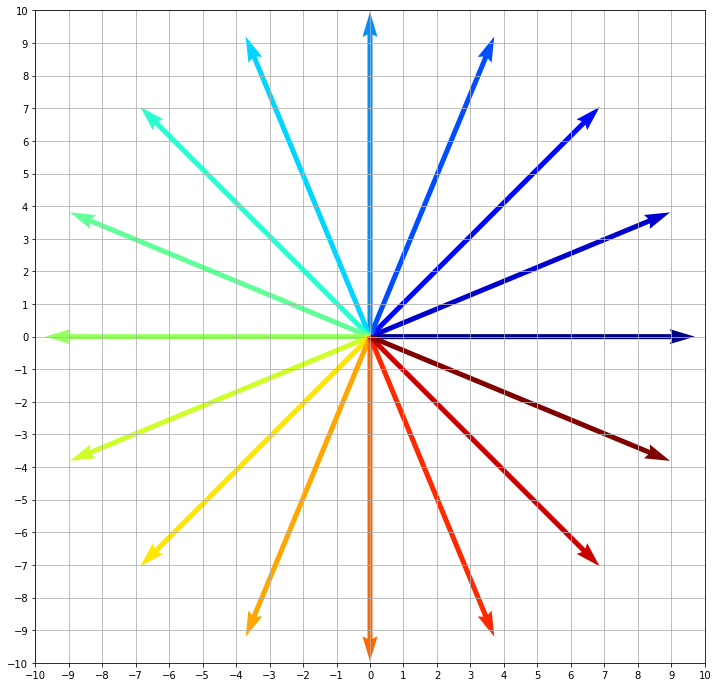

In [92]:
plt.figure(figsize = (12, 12))

o = np.array([0, 0])
v1 = np.array([9.7, 0])
colors = plt.cm.jet(np.linspace(0, 1, 16))

for i in range(16):
    R_rotate = np.array(R.subs(theta, i * sym.pi / 8)).astype(np.float64)
    v = R_rotate.dot(v1)
    plt.quiver(*np.concatenate((o, v)), scale=20, color=colors[i])

plt.xticks(np.arange(-10, 11))
plt.yticks(np.arange(-10, 11))
plt.grid()
plt.show()

#### $R_\theta$ is orthogonal

In [93]:
R.inv().equals(R.T)

True

In [94]:
# the rows and columns are orthonormal
R.row(0).norm(), R.row(1).norm(), R.col(0).norm(), R.col(1).norm()

(sqrt(Abs(sin(theta))**2 + Abs(cos(theta))**2),
 sqrt(Abs(sin(theta))**2 + Abs(cos(theta))**2),
 sqrt(Abs(sin(theta))**2 + Abs(cos(theta))**2),
 sqrt(Abs(sin(theta))**2 + Abs(cos(theta))**2))

#### Inverse of the Rotation Matrix

$$
\text{Let }
R\left(\theta\right) = 
\left[
    \begin{matrix}
        \cos\theta & -\sin\theta \\
        \sin\theta & \cos\theta 
    \end{matrix}
\right]
\\
\text{Show that }
R\left(-\theta\right) = R\left(\theta\right)^{-1}
$$

In [95]:
R

Matrix([
[cos(theta), -sin(theta)],
[sin(theta),  cos(theta)]])

In [96]:
R.subs(theta, -theta)

Matrix([
[ cos(theta), sin(theta)],
[-sin(theta), cos(theta)]])

In [97]:
R.inv() # note the first element evaluates to cos(theta)

Matrix([
[-sin(theta)**2/cos(theta) + 1/cos(theta), sin(theta)],
[                             -sin(theta), cos(theta)]])

In [98]:
# since R.inv() has hard to read output and R.inv() = R.T
#   show R.T 
R.T

Matrix([
[ cos(theta), sin(theta)],
[-sin(theta), cos(theta)]])

#### Three-dimensional Rotation

Find the $3 \times 3$ matrix that rotates a 3D vector and angle $\theta$ counterclockwise around the z-axis

The z-coordinate stays fixed, and the vector rotates an angle $\theta$ in the x-y plane. Therefore,

$$
R_z = 
\left[
    \begin{matrix}
        \cos\theta & -\sin\theta & 0 \\
        \sin\theta & \cos\theta & 0 \\
        0 & 0 & 1
    \end{matrix}
\right]
$$

### Permutation Matrices